<a href="https://colab.research.google.com/github/2147118Joshua/Neural-Networks/blob/main/BPN_classifier_NNDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### BPN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
# data = pd.read_csv('Iris.csv')
# # Loading dataset
# # data = load_iris()
# # Dividing the dataset into target variable and features

# # X=data.data
# # y=data.target

# X=data['PetalLengthCm']
# X=encoder.fit_transform(X)
# np.sort(X)
# y=data['PetalWidthCm']
# y=encoder.fit_transform(y)
# np.sort(y)

# Loading dataset
data = load_iris()
# Dividing the dataset into target variable and features
X=data.data
y=data.target

In [ ]:

# lable= encoder.fit_transform(df.Species)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

In [ ]:
# X_test = np.array(X_test)
y_test = np.array(y_test.reshape(-1,1))
# X_train = np.array(X_train.reshape(-1, 1))
y_train = np.array(y_train.reshape(-1, 1))

In [ ]:
learning_rate = 0.1
iterations = 5000
N = y_train.size
 
# Input features
input_size = 4
 
# Hidden layers 
hidden_size = 2
 
# Output layer
output_size = 3 
 
results = pd.DataFrame(columns=["mse", "accuracy"])

In [ ]:
np.random.seed(10)
 
# Hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   
 
# Output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
 
def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
     
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [ ]:
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)

(130, 1)
(20, 1)
(130, 4)


In [ ]:
for itr in range(iterations):    
     
    # Implementing feedforward propagation on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)
 
    # Implementing feed forward propagation on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
     
     
    # Calculating the error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
     
    # Backpropagation phase
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)
 
    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)
 
     
    # Updating the weights
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N
 
    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update


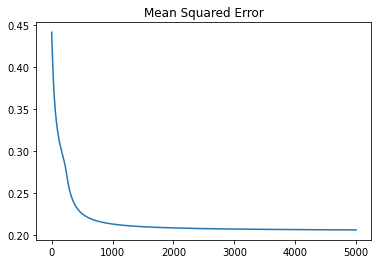

In [ ]:
results.mse.plot(title="Mean Squared Error")

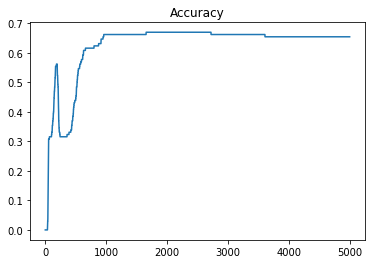

In [ ]:
results.accuracy.plot(title="Accuracy")

In [ ]:
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)
 
Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)
 
acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.85


## **RBF**

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import numpy as np
from sklearn.cluster import KMeans
import sklearn.metrics as cma
import math, random

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = list(iris.target + 1)

In [ ]:
hidden_nodes = 10

In [ ]:
est = KMeans(n_clusters=hidden_nodes)
est.fit(X)

KMeans(n_clusters=10)

In [ ]:
cluster_ctr = est.cluster_centers_
print("cluster centroids",cluster_ctr)

cluster centroids [[5.5125     4.         1.475      0.275     ]
 [6.03529412 2.70588235 5.04117647 1.79411765]
 [6.56818182 3.08636364 5.53636364 2.16363636]
 [5.1        3.51304348 1.52608696 0.27391304]
 [5.615      2.64       4.005      1.225     ]
 [7.475      3.125      6.3        2.05      ]
 [5.         2.3        3.275      1.025     ]
 [5.96153846 2.87692308 4.51538462 1.44615385]
 [4.67894737 3.08421053 1.37894737 0.2       ]
 [6.63333333 3.03333333 4.63333333 1.45833333]]


In [ ]:
f_res = []
for i in X:
    res = []
    #print "original data point",i
    for j in cluster_ctr:
        temp = []
        for x, z in zip(i, j):
            temp.append(x - z)
        #print "data subtracted from mu", temp
        temp = np.array(temp)
        res.append(math.exp(-np.dot(temp, temp.T)/2))
    #print "higher dimensional representation of the original data point", res
    f_res.append(res)

In [ ]:

final_data = np.full((150,hidden_nodes+2), 0.0)
eta = .1

for k in range(150):
    temp = [1]
    temp = np.concatenate((temp, f_res[k], [y[k]]))
    #print "prepared temp", temp
    final_data[k] = temp
#final_res = np.array(final_res)
print("final data with label",final_data)
print("shape of final data", final_data.shape)

final data with label [[1.00000000e+00 8.05974540e-01 1.74709224e-04 ... 8.39201270e-01
  6.73267350e-04 1.00000000e+00]
 [1.00000000e+00 4.99972029e-01 1.86442525e-04 ... 9.72194447e-01
  5.41210972e-04 1.00000000e+00]
 [1.00000000e+00 5.12628881e-01 9.30487003e-05 ... 9.90008697e-01
  2.66527076e-04 1.00000000e+00]
 ...
 [1.00000000e+00 8.16390281e-05 8.31075526e-01 ... 2.53715103e-05
  7.28548275e-01 3.00000000e+00]
 [1.00000000e+00 3.83232757e-05 6.39672273e-01 ... 1.01697373e-05
  4.45213477e-01 3.00000000e+00]
 [1.00000000e+00 2.46486551e-04 9.47287872e-01 ... 1.29458937e-04
  6.46164354e-01 3.00000000e+00]]
shape of final data (150, 12)


In [ ]:

train_data = np.zeros(shape=(120,hidden_nodes+2))
test_data = np.zeros(shape=(30,hidden_nodes+2))
l = k = 0
for i in range(150):
    if i % 5 == 0:
        test_data[l] = final_data[i]
        l += 1
    else:
        train_data[k] = final_data[i]
        k+= 1

print("train data", train_data.shape)
print("test data", test_data.shape)


train data (120, 12)
test data (30, 12)


In [ ]:

#initial weights
u_weights = np.array([[random.uniform(-10, 10) for i in range(hidden_nodes+1)], [random.uniform(-10, 10) for i in range(hidden_nodes+1)],
                      [random.uniform(-10, 10) for i in range(hidden_nodes+1)]])
print(u_weights)

#matrix of weights in the last iteration, required for the termination condition
l_weights = np.full((3, (hidden_nodes + 1)), 0.0)

[[-0.0499908  -5.42481781 -8.8149798   0.89785154  0.46316236 -3.25879716
   9.81503097 -5.10824745 -7.16163242 -2.85503348  2.85873292]
 [-6.94331128  8.31758672  3.90466167  4.31883393  7.73152196  3.18509073
  -6.32362746 -5.5434669  -7.58232125 -0.72286284 -7.91377815]
 [-0.33869048  1.93212749 -1.48132094  6.85010658  3.25287616  8.07024315
   6.64240351 -3.64858945  0.97201913  4.04895129 -7.45083593]]


In [ ]:

def train_model(label):
    print('for class : ', label)
    pdt = 0
    l_weights = np.full((3, (hidden_nodes + 1)), 0.0)
    print('l_weights are', l_weights[label - 1])
    print('u_weights are', u_weights[label - 1])
    # class label >= 0 vs class non-label < 0 - online learning
    #while (abs(l_weights[label - 1] - u_weights[label - 1]).any() > .0001):
    count = 20
    while count > 0:
        print("count: ", 20 - count)
        #l_weights[label - 1] = u_weights[label - 1]

        # show_plot(formula, x_range)
        print('training data and weight vector and pdt is :', final_data[0, :-1], u_weights[label - 1]\
            , np.dot(final_data[0, :-1], np.transpose(u_weights[label - 1])))

        for i in train_data:
            print('initial weights and data vector',(u_weights, i[:-1]))
            pdt = np.dot(i[:-1], np.transpose(u_weights[label - 1]))
            print('product is ',pdt)
            if (i[-1] != label and pdt >= 0):
                u_weights[label - 1] = u_weights[label - 1] - eta * i[:-1]
                print("first case : label is ",label, "wt and data", (u_weights[label-1], eta*i[:-1]))

            if (i[-1] == label and pdt < 0):
                u_weights[label - 1] = u_weights[label - 1] + eta * i[:-1]
                print("second case label is ",label, "wt and data", (u_weights[label-1], eta*i[:-1]))
        #print 'abs diff', abs(l_weights[label - 1] - u_weights[label - 1])
        count -= 1

In [ ]:
def predict_model(test_data):
    pred = [None]*30
    count = 0
    #print "sayandeep",self.test_data
    for i in test_data:
        t_pdt_1 = np.dot(i[:hidden_nodes + 1], np.transpose(u_weights[0]))
        t_pdt_2 = np.dot(i[:hidden_nodes + 1], np.transpose(u_weights[1]))
        t_pdt_3 = np.dot(i[:hidden_nodes + 1], np.transpose(u_weights[2]))
        print(count,"printings",t_pdt_1, t_pdt_2, t_pdt_3)
        if t_pdt_1 >= 0:
            pred[count] = 1
        elif t_pdt_2 >= 0:
            pred[count] = 2
        elif t_pdt_3 >= 0:
            pred[count] = 3
        else:
            pred[count] = 0
        count += 1
    #print self.prediction
    cm = cma.confusion_matrix(test_data[:, -1], pred)
    print('confusion matrix for the model is', cm)
    print()

In [ ]:
train_model(1)
train_model(2)
train_model(3)

Streaming output truncated to the last 5000 lines.
       [ -2.73869048,   0.1610268 ,  -1.01549994,   7.23255677,
          0.87194156,   7.24088408,   6.74961757,  -4.47240219,
          0.64139852,   1.76164151,  -7.42940723]]), array([1.00000000e+00, 2.05351335e-03, 8.02255038e-01, 4.30294628e-01,
       2.50338010e-03, 6.87469716e-01, 7.35805172e-02, 1.65609114e-01,
       9.78431271e-01, 9.87009370e-04, 8.64992258e-01]))
product is  -1.5019549312540459
initial weights and data vector (array([[ -1.9499908 ,  -1.09899126, -10.00393119,  -2.36686762,
          4.96097657,  -3.30017455,   3.71929092,  -4.76417011,
         -7.66552228,   0.93010617,   1.75893771],
       [ -5.34331128,   4.02702094,   2.1090111 ,   3.53973838,
          3.57148282,   8.76368524,  -5.81883415,  -0.08813586,
         -3.41595631,  -3.75930634,   0.04330235],
       [ -2.73869048,   0.1610268 ,  -1.01549994,   7.23255677,
          0.87194156,   7.24088408,   6.74961757,  -4.47240219,
          0.641398

In [ ]:
print("final weights learned", u_weights)
predict_model(test_data)

final weights learned [[ -1.9499908   -1.09899126 -10.00393119  -2.36686762   4.96097657
   -3.30017455   3.71929092  -4.76417011  -7.66552228   0.93010617
    1.75893771]
 [ -5.34331128   4.02702094   2.1090111    3.53973838   3.57148282
    8.76368524  -5.81883415  -0.08813586  -3.41595631  -3.75930634
    0.04330235]
 [ -2.43869048   0.15953941  -0.80798274   7.33922119   0.8694101
    7.26664812   6.77356863  -4.4875037    0.73503669   1.76006756
   -7.33697758]]
0 printings 2.51365253268827 -1.6256026993631216 -0.15573382372840372
1 printings 1.3697858008724315 -0.15989024209991745 -0.7546089312122908
2 printings 1.9309916361702106 -0.454098409219672 -0.49091401667047635
3 printings -0.04510156991263889 -0.5876564080721106 -1.40619401975119
4 printings 1.7935225416739715 -1.1436338007819244 -0.5323407019075858
5 printings 1.8645674586895484 -3.3996076730775213 -0.4105858071545429
6 printings 2.0294405207237123 -3.640620273279384 -0.3021627578933695
7 printings 2.387624208518189 -3